In [7]:
#MNIST
#Dataloader, Transformation
#Multilayer Neural Net, activation function
#Loss and Optimizer
#Training loop
#Model Evaluation
#GPU Support

In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transform
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm


In [9]:
#device config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#hyper parameters
input_size = 784 #28x28
hidden_size = 100
num_classes = 10
num_epoches = 100
batch_size = 100
learning_rate = 0.001

#MNIST
train_dataset = torchvision.datasets.MNIST(root="./data", train=True, transform=transform.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root="./data", train=False, transform=transform.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True)

train_dataset.data.shape

torch.Size([60000, 28, 28])

In [10]:
print(type(train_dataset))
print(type(train_dataset.data))
print("Total number of data is {}\n  Batch size is {}  \n The number of batch {}".format(train_dataset.data.shape[0], batch_size, train_dataset.data.shape[0]/ batch_size))

<class 'torchvision.datasets.mnist.MNIST'>
<class 'torch.Tensor'>
Total number of data is 60000
  Batch size is 100  
 The number of batch 600.0


### View single data

In [11]:
example = iter(train_loader)
samples, labels = next(example)
print(samples.shape, labels.shape)
torchvision.transforms.functional.to_pil_image(train_dataset.data[2]) #view data image


torch.Size([100, 1, 28, 28]) torch.Size([100])


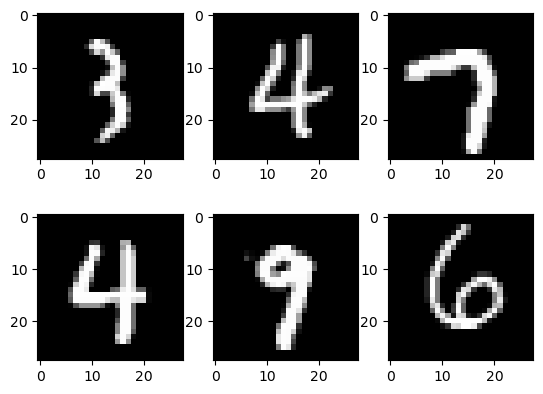

In [12]:
for i in range(6):
    plt.subplot(2,3, i+1)
    plt.imshow(samples[i][0], cmap="grey")
plt.show()

### Model

In [13]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()

        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        return out



In [14]:
len(train_loader)

600

In [15]:
model = NeuralNet(input_size=input_size, hidden_size=hidden_size, num_classes=num_classes).to(device)
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
epoch_bar = tqdm(desc="epoch bar", total=num_epoches, position=0)

#training loop
n_total_steps = len(train_loader) #batch number
train_bar= tqdm(desc="Train bar", total=n_total_steps, position=1)

for epoch in range(num_epoches):
    for i, (images, label) in  enumerate(train_loader):
        #reshape data
        images = images.reshape(-1,28*28).to(device)
        label = label.to(device)
        #forward pass
        y_pred = model(images)
        l = loss(y_pred,label)
        #backward pass
        l.backward()
        optimizer.step()
        optimizer.zero_grad()
        train_bar.update()

    epoch_bar.update()
    train_bar.n = 0
    train_bar.refresh()



epoch bar:   0%|          | 0/100 [00:00<?, ?it/s]

Train bar:   0%|          | 0/600 [00:00<?, ?it/s]

In [1]:
from tqdm.notebook import tqdm
bar = tqdm(desc="dammy", total=100, position=0)
bar2 = tqdm(desc="dammy2", total=100, position=1)
import time

for j in range(100):
    bar.update()
    for i in range(100):
        bar2.set_postfix(i=i)
        bar2.update()
        time.sleep(0.01)

    bar2.n =0
    # bar2.refresh()

dammy:   0%|          | 0/100 [00:00<?, ?it/s]

dammy2:   0%|          | 0/100 [00:00<?, ?it/s]

In [48]:
d = iter(test_loader)
i,l = next(d)

pred = model(i.reshape(-1,28*28).to(device))
# print(torch.max(pred,dim=1))
# print(l)
(torch.max(pred,dim=1)[1].to('cpu') == l).sum().item()


92

In [50]:
#test
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for image, label in test_loader:
        image = image.reshape(-1, 28*28).to(device)
        label = label.to(device)
        output = model(image)
    _, predicion = torch.max(output,dim=1)
    n_samples += label.shape[0]
    n_correct += (predicion == label).sum().item()
print(n_correct / n_samples)

0.93
